# Project 2 - Web Scraping - Idealista Website

<p align="center">
    <img width="500" src="https://it-s.com/wp-content/webp-express/webp-images/uploads/2020/01/featured-image.jpg.webp" alt="Scrape">
</p>

The purpuse of this file is to scrape the Idealista Website and obtain the current Market situation for "El Clot" neighborhood house pricing.

In [97]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from selenium import webdriver
import undetected_chromedriver as uc
from datetime import date
import random
import time
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

## 1 - Creating a Web Scraping function from Idealista's Website:

In [5]:
#List of the different values needed to be scrapped
dir_ = []
price= []
room = []
mt2 = []
plant = []
lift = []
link = []

#Dictionary containing all the different values from previous list with it's corresponding Column name.
web_dict = {
        'Address': dir_,
        'Price €': price,
        'Rooms': room,
        'Size m2': mt2,
        'Floor': plant,
        'Lift': lift,
        'Links': link
    }

def idealista_scrape():
    driver = uc.Chrome()
    #iterating in a range of 5 since there are only 4 pages to be scrapped
    for x in range(1,5):
        url = f'https://www.idealista.com/venta-viviendas/barcelona/sant-marti/el-clot/pagina-{x}.htm'
        driver.get(url)
        html = driver.page_source
        soup = BeautifulSoup(html, 'lxml')
        time.sleep(random.randint(5,16))

        #Iterating on the same dir_data element to obtain the address and the link of the site        
        dir_data = soup.find_all('a', attrs = {'class': 'item-link'})
        for i in dir_data:
            if i.getText().strip():
                dir_.append(i.getText().strip())
            if i.get('href'):
                link.append('https://www.idealista.com'+i.get('href'))

        #Iterating on the same price_data element to obtain the price of each appartment published.        
        price_data = soup.find_all('span', attrs = {'class': 'item-price h2-simulated'})
        for i in price_data:
            if i.getText():
                price.append(int(i.getText().split('€')[0].replace('.','')))

        #Iterating on the same details_data element to obtain the number of rooms, m2 plant and type of lifts.        
        details_data = soup.find_all('div', attrs = {'class': 'item-detail-char'})
        for i in details_data:
            if i.getText().strip().split('\n'):
                try:
                    room.append(int(i.getText().strip().split('\n')[0].split(' ')[0]))
                    mt2.append(int(i.getText().strip().split('\n')[1].split(' ')[0]))
                    plant.append(i.getText().strip().split('\n')[2][:-12].replace('ª','').strip())
                    lift.append(i.getText().strip().split('\n')[2][-12:].strip().capitalize())
                except:
                    plant.append('N/A')
                    lift.append('N/A')
    #uc.Chrome().close
    return web_dict

In [6]:
idealista_scrape()

{'Address': ['Piso en calle de Biscaia, El Clot, Barcelona',
  'Piso en El Clot, Barcelona',
  "Piso en calle d'Aragó, El Clot, Barcelona",
  'Piso en El Clot, Barcelona',
  'Piso en calle de Mallorca, El Clot, Barcelona',
  'Piso en Gran Via de les Corts Catalanes, El Clot, Barcelona',
  'Piso en El Clot, Barcelona',
  'Piso en calle de Aragón, El Clot, Barcelona',
  'Piso en calle de Rafael Capdevila, El Clot, Barcelona',
  'Piso en calle de Biscaia, El Clot, Barcelona',
  'Piso en calle de Mallorca, El Clot, Barcelona',
  "Piso en calle d'Aragó, El Clot, Barcelona",
  'Piso en Gran Via de les Corts Catalanes, El Clot, Barcelona',
  'Piso en Gran Via de les Corts Catalanes, El Clot, Barcelona',
  'Piso en calle de Valencia, El Clot, Barcelona',
  'Piso en camino de la Verneda, El Clot, Barcelona',
  'Piso en Gran Via de les Corts Catalanes, El Clot, Barcelona',
  'Piso en El Clot, Barcelona',
  'Piso en El Clot, Barcelona',
  'Piso en Gran Via de les Corts Catalanes, El Clot, Barcelo

In [7]:
len(web_dict['Floor'])

84

## 2 - Generating a DataFrame from the scrapped Data gathered:

In [8]:
#Creating the DataFrame from the dictionary created from scrape
df = pd.DataFrame(web_dict)
#this function will provide the CBM price based on the price and the size of the appartment
def price_m2 (row):
    if str(row['Price €']) != 'nan' and str(row['Size m2']) != 'nan':
        return round(int(row['Price €']) / int(row['Size m2']),2)
    else:
        return 0
#Applying the function to create the coolum:
df['Price_M2'] = df.apply(lambda row: price_m2(row), axis=1)
df

,Address,Price €,Rooms,Size m2,Floor,Lift,Links,Price_M2
0,"Piso en calle de Biscaia, El Clot, Barcelona",379800,4,94,Planta 2 exterior,Con ascensor,https://www.idealista.com/inmueble/97301401/,4040.43
1,"Piso en El Clot, Barcelona",365000,3,90,Planta 1 exterior,Con ascensor,https://www.idealista.com/inmueble/100325421/,4055.56
2,"Piso en calle d'Aragó, El Clot, Barcelona",375000,3,75,exterior,Con ascensor,https://www.idealista.com/inmueble/100357573/,5000.00
3,"Piso en El Clot, Barcelona",328000,4,82,Entreplanta exterior,Con ascensor,https://www.idealista.com/inmueble/100921200/,4000.00
4,"Piso en calle de Mallorca, El Clot, Barcelona",276000,3,89,Planta 6 interior,Con ascensor,https://www.idealista.com/inmueble/100893798/,3101.12
...,...,...,...,...,...,...,...,...
79,"Piso en calle d'Aragó, El Clot, Barcelona",218500,2,82,Planta 4 exterior,Sin ascensor,https://www.idealista.com/inmueble/96294221/,2664.63
80,"Piso en Gran via de les Corts Catalenes, s/n, ...",200000,2,75,Bajo interior,Con ascensor,https://www.idealista.com/inmueble/100462929/,2666.67
81,"Piso en calle del Clot, El Clot, Barcelona",213000,2,89,Bajo exterior,Sin ascensor,https://www.idealista.com/inmueble/100751362/,2393.26
82,"Piso en avenida Meridiana, El Clot, Barcelona",367000,4,108,Planta 1,Sin ascensor,https://www.idealista.com/inmueble/100046385/,3398.15


## 3 - Creating a Function to save the Data scrapped (in case of losing it in the process):

In [60]:
#Creating a Today variable to obtain today's date which would be used for reference of the file creation after the scrape is done
def save_df_idealista():
    today = str(pd.to_datetime('today'))[:10].replace('-','')
    df.to_csv(f'C:/Users/maria/Desktop/Projects/Project_2_Web_Scraping/Data/Idealista_scrape{today}.csv', index=False)
    print (f'Data Saved with today date: ',today)
    return df

In [61]:
save_df_idealista()

Data Saved with today date:  20230331


,Address,Price €,Rooms,Size m2,Floor,Lift,Links,Price_M2,Clot_Price_Alert,YoY_Price_Alert
0,"Piso en calle de Biscaia, El Clot, Barcelona",379800,4,94,Planta 2 exterior,Con ascensor,https://www.idealista.com/inmueble/97301401/,4040.43,Over Priced,Not Best Price YoY
1,"Piso en El Clot, Barcelona",365000,3,90,Planta 1 exterior,Con ascensor,https://www.idealista.com/inmueble/100325421/,4055.56,Over Priced,Not Best Price YoY
2,"Piso en calle d'Aragó, El Clot, Barcelona",375000,3,75,exterior,Con ascensor,https://www.idealista.com/inmueble/100357573/,5000.00,Over Priced,Not Best Price YoY
3,"Piso en El Clot, Barcelona",328000,4,82,Entreplanta exterior,Con ascensor,https://www.idealista.com/inmueble/100921200/,4000.00,Over Priced,Not Best Price YoY
4,"Piso en calle de Mallorca, El Clot, Barcelona",276000,3,89,Planta 6 interior,Con ascensor,https://www.idealista.com/inmueble/100893798/,3101.12,Good Price,Good Price YoY
...,...,...,...,...,...,...,...,...,...,...
79,"Piso en calle d'Aragó, El Clot, Barcelona",218500,2,82,Planta 4 exterior,Sin ascensor,https://www.idealista.com/inmueble/96294221/,2664.63,Good Price,Good Price YoY
80,"Piso en Gran via de les Corts Catalenes, s/n, ...",200000,2,75,Bajo interior,Con ascensor,https://www.idealista.com/inmueble/100462929/,2666.67,Good Price,Good Price YoY
81,"Piso en calle del Clot, El Clot, Barcelona",213000,2,89,Bajo exterior,Sin ascensor,https://www.idealista.com/inmueble/100751362/,2393.26,Good Price,Good Price YoY
82,"Piso en avenida Meridiana, El Clot, Barcelona",367000,4,108,Planta 1,Sin ascensor,https://www.idealista.com/inmueble/100046385/,3398.15,Not Best Price,Good Price YoY


## 4 - Creating a Function to scrape BCN Ayuntamiento's wesite with historical prices:

In [25]:
#Creating a funciton to scrape the ayuntamiento of Barcelona website with the historical Data from Barcelona and returning a DF
def ayuntamiento_scrape():
    url_ayuntamiento = 'https://ajuntament.barcelona.cat/estadistica/angles/Estadistiques_per_temes/Habitatge_i_mercat_immobiliari/Mercat_immobiliari/Preu_oferta_habitatge_segona_ma/evo/t2mab.htm'
    req2 = requests.get(url_ayuntamiento)
    soup2 = BeautifulSoup(req2.content, 'lxml')
    table = soup2.find_all('table')[0]
    #Slicing upto 20 results as requested in lab:
    df_a = pd.read_html(table.prettify())[0]
    #Reducing the number of col (excluding 10 and 15 that does not have data)
    df_a = df_a[[3,4,5,6,7,8,9,11,12,13,14]]
    #Converting row 4 as headers
    df_a.columns = df_a.iloc[4]
    df_a = df_a[9:82]
    df_a.rename(columns={"Dto. Barrios":"Barrios"}, inplace=True)
    df_a['Barrios'] = df_a['Barrios'].str.split('.').str[1].str.strip().str.capitalize()
    return df_a

In [55]:
df_a = ayuntamiento_scrape()
df_a

4,Barrios,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
9,El raval,2.614,2.404,2.775,3.251,4.029,4.034,4.591,3.587,3.409,3.374
10,El barri gòtic,3.811,3.791,4.236,4.813,4.884,4.660,3.811,4.717,4.351,5.186
11,La barceloneta,4.212,4.168,4.043,4.683,5.165,4.815,4.849,4.763,4.672,4.732
12,"Sant pere, santa caterina i la ribera",3.534,3.682,3.827,4.501,5.152,4.689,4.772,4.837,4.778,4.705
13,El fort pienc,3.038,3.022,3.228,4.012,4.107,4.500,4.250,4.091,4.428,4.644
...,...,...,...,...,...,...,...,...,...,...,...
77,Diagonal mar i el front marítim del poblenou,4.722,5.646,6.506,5.891,6.402,6.836,6.892,6.237,6.400,7.524
78,El besòs i el maresme,-,2.002,1.951,2.222,2.786,2.822,2.759,2.547,2.368,2.184
79,Provençals del poblenou,-,3.069,3.397,3.310,3.194,3.362,3.407,2.994,3.122,3.319
80,Sant martí de provençals,-,-,2.273,2.547,2.759,2.926,3.022,2.867,2.864,2.975


In [56]:
#Replacing numbers with '.' from 2013 to 2022 and make them integers
def num_replace(df_a):
    for i in range(2013,2023):
        df_a[f'{i}'] = df_a[f'{i}'].str.replace('.','').replace('-',0).astype(int)
    return df_a
df_a = num_replace(df_a)
df_a

4,Barrios,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
9,El raval,2614,2404,2775,3251,4029,4034,4591,3587,3409,3374
10,El barri gòtic,3811,3791,4236,4813,4884,4660,3811,4717,4351,5186
11,La barceloneta,4212,4168,4043,4683,5165,4815,4849,4763,4672,4732
12,"Sant pere, santa caterina i la ribera",3534,3682,3827,4501,5152,4689,4772,4837,4778,4705
13,El fort pienc,3038,3022,3228,4012,4107,4500,4250,4091,4428,4644
...,...,...,...,...,...,...,...,...,...,...,...
77,Diagonal mar i el front marítim del poblenou,4722,5646,6506,5891,6402,6836,6892,6237,6400,7524
78,El besòs i el maresme,0,2002,1951,2222,2786,2822,2759,2547,2368,2184
79,Provençals del poblenou,0,3069,3397,3310,3194,3362,3407,2994,3122,3319
80,Sant martí de provençals,0,0,2273,2547,2759,2926,3022,2867,2864,2975


In [62]:
def save_df_ayuntamiento():
    today = str(pd.to_datetime('today'))[:10].replace('-','')
    df_a.to_csv(f'C:/Users/maria/Desktop/Projects/Project_2_Web_Scraping/Data/ayuntamiento_scrape{today}.csv', index=False)
    print (f'Data Saved with today date: ',today)
    return df_a

In [63]:
save_df_ayuntamiento()

Data Saved with today date:  20230331


4,Barrios,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
9,El raval,2614,2404,2775,3251,4029,4034,4591,3587,3409,3374
10,El barri gòtic,3811,3791,4236,4813,4884,4660,3811,4717,4351,5186
11,La barceloneta,4212,4168,4043,4683,5165,4815,4849,4763,4672,4732
12,"Sant pere, santa caterina i la ribera",3534,3682,3827,4501,5152,4689,4772,4837,4778,4705
13,El fort pienc,3038,3022,3228,4012,4107,4500,4250,4091,4428,4644
...,...,...,...,...,...,...,...,...,...,...,...
77,Diagonal mar i el front marítim del poblenou,4722,5646,6506,5891,6402,6836,6892,6237,6400,7524
78,El besòs i el maresme,0,2002,1951,2222,2786,2822,2759,2547,2368,2184
79,Provençals del poblenou,0,3069,3397,3310,3194,3362,3407,2994,3122,3319
80,Sant martí de provençals,0,0,2273,2547,2759,2926,3022,2867,2864,2975


In [36]:
#DF for the Max Price Barrio
max_bar_yoy = df_a.loc[df_a['2022'] == df_a['2022'].max()]
#DF for the Min Price Barrio
min_bar = df_a.loc[df_a['2022'] != 0]
min_bar.loc[min_bar['2022'] == min_bar['2022'].min()]
min_bar_yoy = min_bar.loc[[63]]
#DF for El Clot YoY
el_clot_yoy = df_a.loc[[73]]
min_2022 = min_bar['2022'].min()
max_2022 = df_a['2022'].max()
mean_2022 = df_a['2022'].mean()
d = [['2022',mean_2022,min_2022,max_2022]]
c = ['Price_year','Mean','Min','Max']
price_2022 = pd.DataFrame(d,columns=c)
price_2022

,Price_year,Mean,Min,Max
0,2022,3466.219178,1626,7524


In [37]:
el_clot_yoy

4,Barrios,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
73,El clot,2509,2246,2505,3144,3524,3803,3822,3767,3645,3644


In [42]:
clot_min = df_a.loc[[73]].min(axis=1).tolist()[0]
clot_max = df_a.loc[[73]].max(axis=1).tolist()[0]
clot_mean = df_a.loc[[73]].mean(axis=1).tolist()[0]
d = [['el Clot',clot_mean,clot_min,clot_max]]
c = ['Barrio','Mean','Min','Max']
price_clot = pd.DataFrame(d,columns=c)
price_clot

,Barrio,Mean,Min,Max
0,el Clot,3260.9,2246,3822


In [39]:
price_clot = price_clot()
price_clot

,Barrio,Mean,Min,Max
0,el Clot,3260.9,2246,3822


## 5 - Creating a Functions to compare current Market Price against historical Data:

In [43]:
#Creating a function to compare the Price M2 against Clot Min, Max and Mean
def clot_price_alert (row):
    if str(row['Price_M2']) != 'nan':
        if int(row['Price_M2']) <= clot_min:
            return 'Low Price'
        elif int(row['Price_M2']) > clot_max:
            return 'Over Priced'
        elif int(row['Price_M2']) > clot_min and int(row['Price_M2']) < clot_mean:
            return 'Good Price'
        else:
            return 'Not Best Price'

#Applying the func to create the column
df['Clot_Price_Alert'] = df.apply(lambda row: clot_price_alert(row), axis=1)

#Creating a function to compare the Price M2 against 2022 min,max and mean price
def yoy_price_alert (row):
    if str(row['Price_M2']) != 'nan':
        if int(row['Price_M2']) <= min_2022:
            return 'Low Price YoY'
        elif int(row['Price_M2']) > max_2022:
            return 'Over Priced YoY'
        elif int(row['Price_M2']) > min_2022 and int(row['Price_M2']) < mean_2022:
            return 'Good Price YoY'
        else:
            return 'Not Best Price YoY'

#Applying the func to create the column
df['YoY_Price_Alert'] = df.apply(lambda row: yoy_price_alert(row), axis=1)

#Sorting the DF by Lowest Price M2
df.sort_values(['Price_M2'])

,Address,Price €,Rooms,Size m2,Floor,Lift,Links,Price_M2,Clot_Price_Alert,YoY_Price_Alert
15,"Piso en camino de la Verneda, El Clot, Barcelona",120000,2,51,Planta 2 exterior,Con ascensor,https://www.idealista.com/inmueble/99561116/,2352.94,Good Price,Good Price YoY
81,"Piso en calle del Clot, El Clot, Barcelona",213000,2,89,Bajo exterior,Sin ascensor,https://www.idealista.com/inmueble/100751362/,2393.26,Good Price,Good Price YoY
55,"Piso en calle del Clot, El Clot, Barcelona",187000,2,78,Planta 3 exterior,Sin ascensor,https://www.idealista.com/inmueble/99095184/,2397.44,Good Price,Good Price YoY
79,"Piso en calle d'Aragó, El Clot, Barcelona",218500,2,82,Planta 4 exterior,Sin ascensor,https://www.idealista.com/inmueble/96294221/,2664.63,Good Price,Good Price YoY
38,"Piso en calle d'Aragó, El Clot, Barcelona",218500,2,82,Planta 4 exterior,Sin ascensor,https://www.idealista.com/inmueble/100091600/,2664.63,Good Price,Good Price YoY
...,...,...,...,...,...,...,...,...,...,...
6,"Piso en El Clot, Barcelona",439350,3,90,Planta 2 exterior,Con ascensor,https://www.idealista.com/inmueble/97601468/,4881.67,Over Priced,Not Best Price YoY
2,"Piso en calle d'Aragó, El Clot, Barcelona",375000,3,75,exterior,Con ascensor,https://www.idealista.com/inmueble/100357573/,5000.00,Over Priced,Not Best Price YoY
41,"Piso en calle de Aragón, El Clot, Barcelona",375000,3,75,Planta 2 interior,Con ascensor,https://www.idealista.com/inmueble/100884458/,5000.00,Over Priced,Not Best Price YoY
35,"Piso en avenida Meridiana, El Clot, Barcelona",247000,1,40,Planta 2 exterior,Con ascensor,https://www.idealista.com/inmueble/100597670/,6175.00,Over Priced,Not Best Price YoY


## 6 - Creating a Sub-DataFrame from Ayuntamiento to visualize

In [44]:
#Creating a sub-DataFrame with the lowest and max price Barrios and El Clot to be able to compare the evolution of each
a = df_a.loc[df_a['2022'] != 0]
a.loc[a['2022'] == a['2022'].min()]
a = a.loc[[63,73,77]]
#Transposing data for Visualization purpuses
a = a.T
#Setting new column names from first row
a.columns = a.iloc[0]
#Resetting index
a = a.reset_index(level=[0])
a[1:]
a.columns = a.iloc[0]
a = a[1:]
#Renaming columns and sorting values
a.rename(columns={"Barrios":"Years", 'Ciutat meridiana (5)':'Ciutat meridiana','Diagonal mar i el front marítim del poblenou':'Diagonal mar'}, inplace=True)
a.sort_values(by="Years", ascending=True)
#Changing values to int as they were changed to object after the Transpose
a['Years'] = a['Years'].astype(int)
a['El clot'] = a['El clot'].astype(int)
a['Ciutat meridiana'] = a['Ciutat meridiana'].astype(int)
a['Diagonal mar'] = a['Diagonal mar'].astype(int)
a.sort_values(by="Years", ascending=True)
a

,Years,Ciutat meridiana,El clot,Diagonal mar
1,2013,1426,2509,4722
2,2014,1281,2246,5646
3,2015,1212,2505,6506
4,2016,1313,3144,5891
5,2017,1498,3524,6402
6,2018,0,3803,6836
7,2019,1727,3822,6892
8,2020,1690,3767,6237
9,2021,1776,3645,6400
10,2022,1626,3644,7524


In [72]:
def euribor_historico():
    driver2 = uc.Chrome()
    url2 = 'https://www.idealista.com/news/euribor/historico-diario/'
    driver2.get(url2)
    html2 = driver2.page_source
    soup2 = BeautifulSoup(html2, 'lxml')

    #Finding the table       
    table = soup2.find_all('table')[0]
    #Creating the DF
    df_e = pd.read_html(table.prettify())[0]
    return df_e

In [74]:
df_e = euribor_historico()
df_e

,Año,Mes,Valor
0,2023,Marzo,"3,785%"
1,2023,Enero,"3,337%"
2,2022,Diciembre,"3,018%"
3,2022,Noviembre,"2,828%"
4,2022,Octubre,"2,629%"
...,...,...,...
285,1999,Mayo,"2,683%"
286,1999,Abril,"2,756%"
287,1999,Marzo,"3,046%"
288,1999,Febrero,"3,03%"


In [76]:
df_e['Valor'] = df_e['Valor'].str.replace(',','.').str.replace('%','').astype(float)
df_e

,Año,Mes,Valor
0,2023,Marzo,3.785
1,2023,Enero,3.337
2,2022,Diciembre,3.018
3,2022,Noviembre,2.828
4,2022,Octubre,2.629
...,...,...,...
285,1999,Mayo,2.683
286,1999,Abril,2.756
287,1999,Marzo,3.046
288,1999,Febrero,3.030


In [102]:
interes_yoy_mean = pd.DataFrame(df_e.groupby(['Año'])['Valor'].mean())
interes_yoy_mean

,Valor
Año,
1999,3.181667
2000,4.781000
2001,4.083750
2002,3.493417
2003,2.336667
2004,2.273583
2005,2.334167
2006,3.436333
2007,4.449833


In [110]:
barrios_int_yoy = pd.merge(a,interes_yoy_mean, left_on='Years', right_on='Año')
barrios_int_yoy.rename(columns={"Valor":"Euribor"}, inplace=True)
barrios_int_yoy

,Years,Ciutat meridiana,El clot,Diagonal mar,Euribor
0,2013,1426,2509,4722,0.536083
1,2014,1281,2246,5646,0.476500
2,2015,1212,2505,6506,0.168417
3,2016,1313,3144,5891,-0.034417
4,2017,1498,3524,6402,-0.145250
5,2018,0,3803,6836,-0.173000
6,2019,1727,3822,6892,-0.214917
7,2020,1690,3767,6237,-0.303333
8,2021,1776,3645,6400,-0.490750
9,2022,1626,3644,7524,1.087667


## 7 - Visualizing Data to make Conclusions

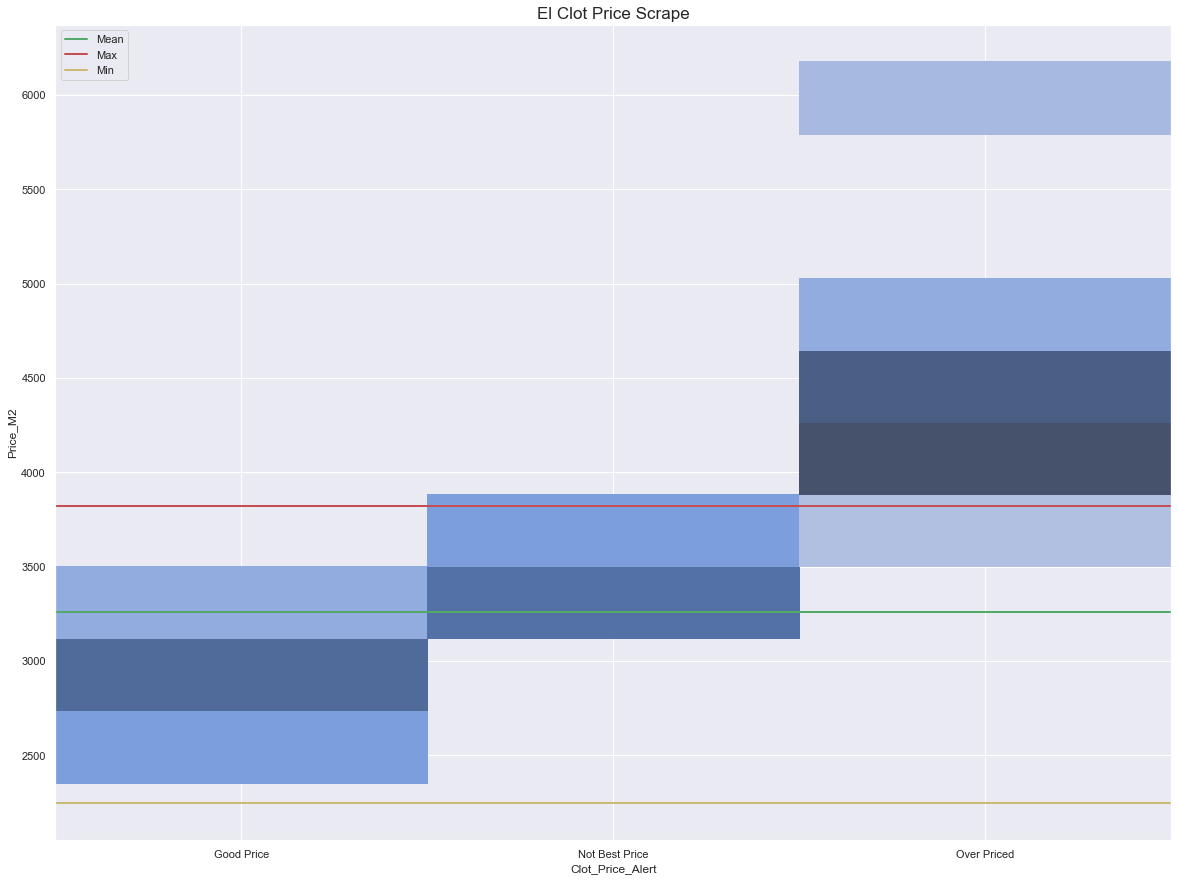

In [66]:
def fig_clot_price_scrape(df):
    df['Clot_Price_Alert'] = pd.Categorical(df['Clot_Price_Alert'], ['Low Price','Good Price','Not Best Price','Over Priced'])
    fig_clot_price_scrape= sns.histplot(data=df, x= "Clot_Price_Alert",y="Price_M2", palette="rocket",bins=10, alpha=1)
    sns.set(rc={"figure.figsize": (20,15)})
    plt.axhline(clot_mean, c="g", linewidth=2, label="Mean")
    plt.axhline(clot_max, c="r", linewidth=2, label="Max")
    plt.axhline(clot_min, c="y", linewidth=2, label="Min")
    plt.legend(labels = ['Mean', 'Max', 'Min'], loc='upper left')
    plt.title("El Clot Price Scrape", size=17)
    fig_clot_price_scrape.figure.savefig("C:/Users/maria/Desktop/Projects/Project_2_Web_Scraping/images/fig_clot_price_scrape.jpg", dpi=500);
fig_clot_price_scrape(df)

In [119]:
#This fig save option fund is very poor
fig = px.box(df, x="Clot_Price_Alert", y="Price_M2", color="Lift", 
             color_discrete_map={1: '#19D3F3', 0: 'red'}, title = 'El Clot Price Scrape - Alert Price by Lift Type') 
sns.set(rc={"figure.figsize": (20,15)})
fig.show()

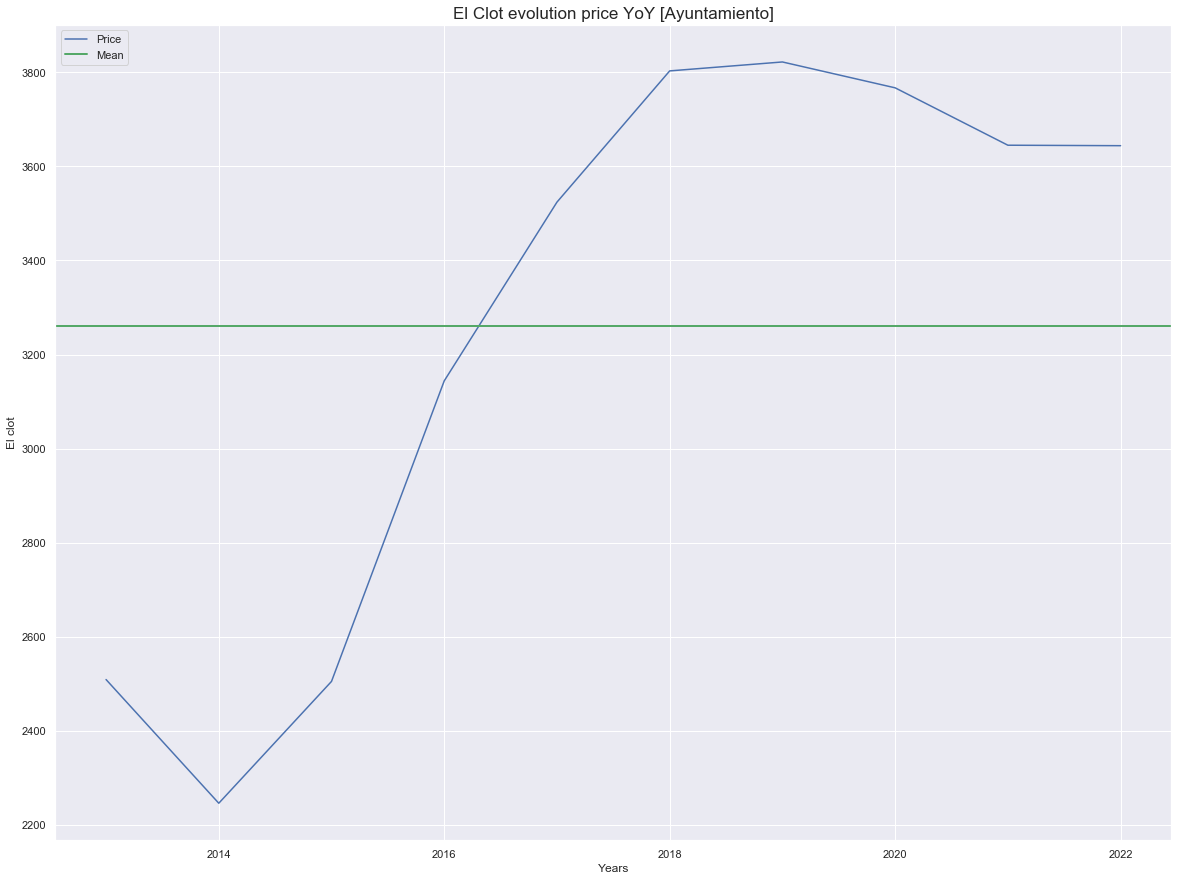

In [49]:
def fig_clot_price_evo_yoy(df):
    fig_clot_price_evo_yoy = sns.lineplot(data=a, y=a['El clot'] ,x=a.Years)
    sns.set(rc={"figure.figsize": (20,15)})
    plt.axhline(clot_mean, c="g", linewidth=2, label="Mean")
    plt.legend(labels = ['Price','Mean'], loc='upper left')
    plt.title("El Clot evolution price YoY [Ayuntamiento]", size=17);
    fig_clot_price_evo_yoy.figure.savefig("C:/Users/maria/Desktop/Projects/Project_2_Web_Scraping/images/fig_clot_price_evo_yoy.jpg", dpi=500);
fig_clot_price_evo_yoy(df)

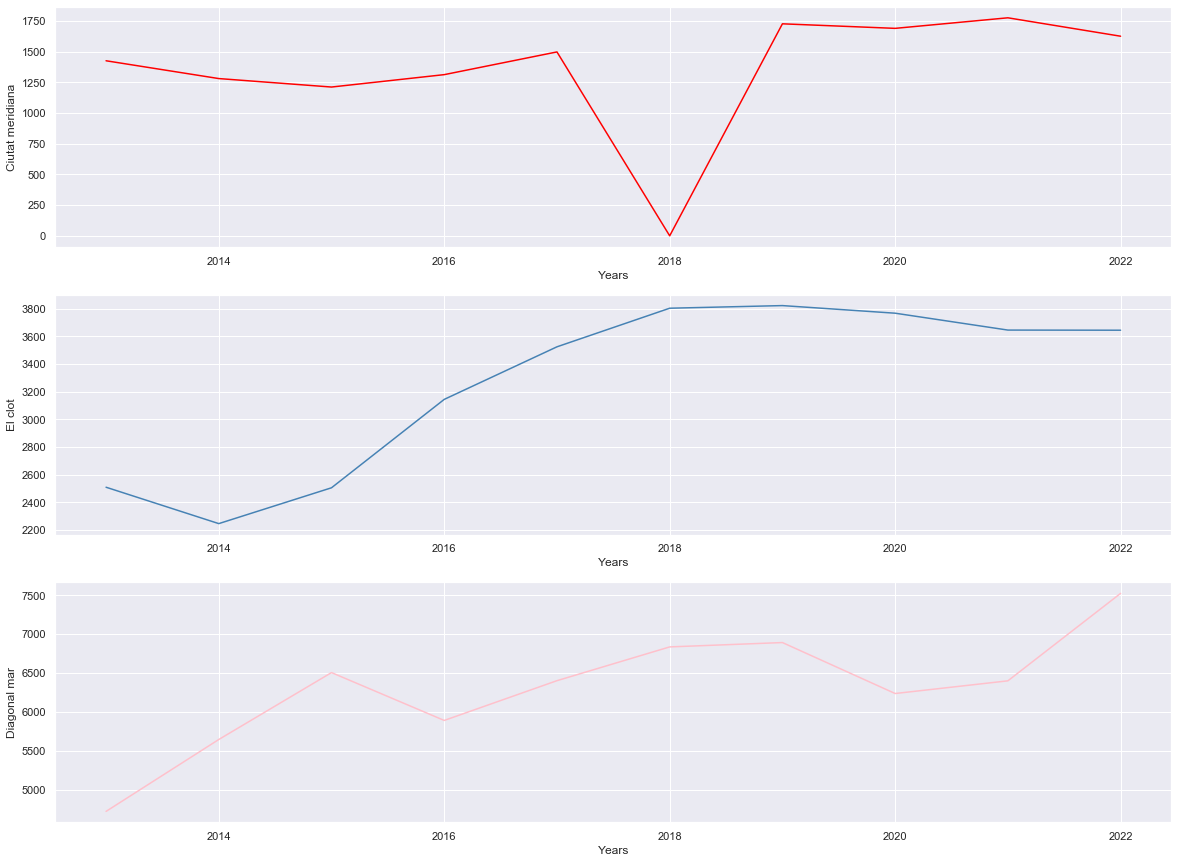

In [50]:
#Not possible to save fig
def fig_3_barrios(df):
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(20,15))
    sns.lineplot(data=a, y=a['Ciutat meridiana'] ,x=a.Years, ax=axs[0], color = 'red')
    sns.lineplot(data=a, y=a['El clot'] ,x=a.Years, ax=axs[1], color = 'steelblue')
    sns.lineplot(data=a, y=a['Diagonal mar'] ,x=a.Years, ax=axs[2], color = 'pink');
fig_3_barrios(df)

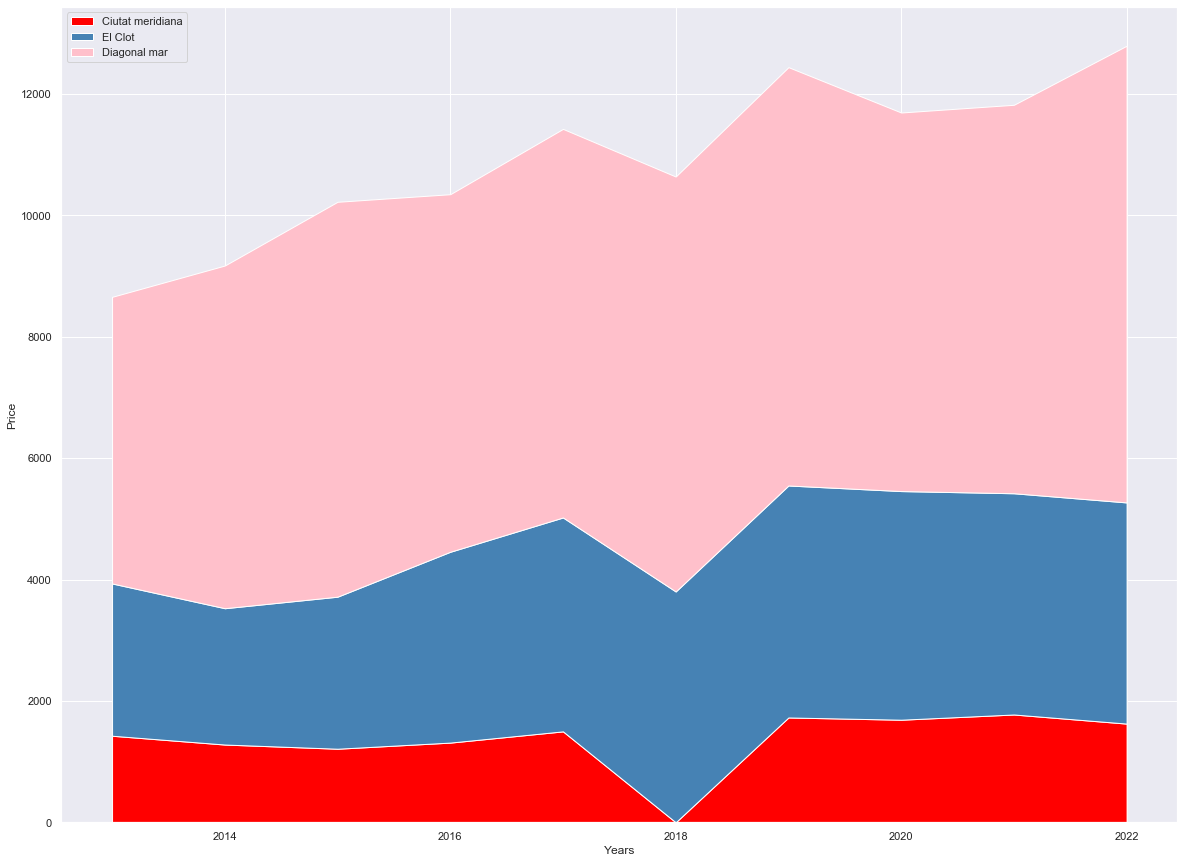

In [51]:
#Not possible to save fig
def fig_3_barrios_yoy(df):
    #define colors to use in chart
    color_map = ['red', 'steelblue', 'pink']
    #create area chart
    fig_3_barrios_yoy=plt.stackplot(a['Years'], a['Ciutat meridiana'], a['El clot'], a['Diagonal mar'],
                  labels=['Ciutat meridiana', 'El Clot', 'Diagonal mar'],
                 colors= color_map)
    #add legend
    plt.legend(loc='upper left')
    #add axis labels
    plt.xlabel('Years')
    plt.ylabel('Price')
    sns.set(rc={"figure.figsize": (20,15)})
    plt.show()
fig_3_barrios_yoy(df)

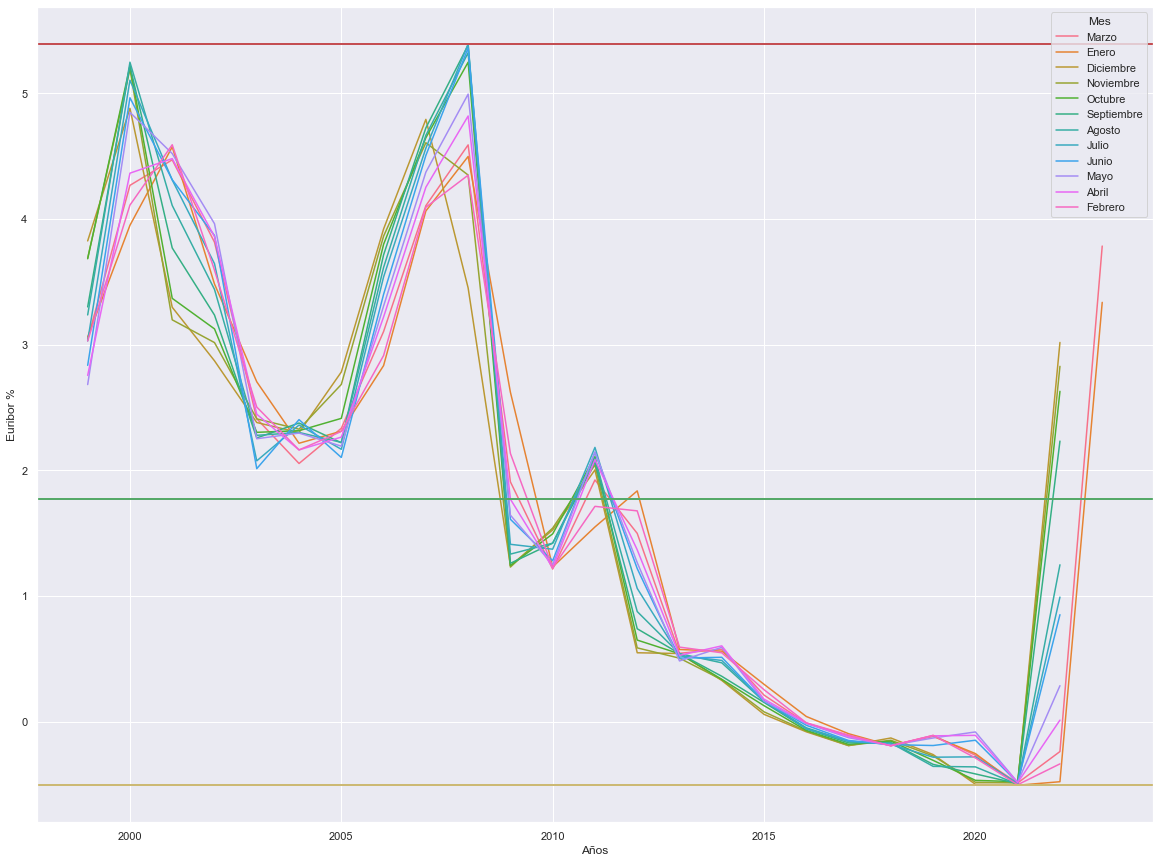

In [94]:
def fig_euribor_evo():
    fig_euribor_evo = sns.lineplot(data=df_e, x="Año", y="Valor", hue="Mes")
    plt.xlabel('Años')
    plt.ylabel('Euribor %')
    plt.axhline(df_e['Valor'].mean(), c="g", linewidth=2, label="Mean")
    plt.axhline(df_e['Valor'].max(), c="r", linewidth=2, label="Max")
    plt.axhline(df_e['Valor'].min(), c="y", linewidth=2, label="Min")
    sns.set(rc={"figure.figsize": (20,15)})
    fig_euribor_evo.figure.savefig("C:/Users/maria/Desktop/Projects/Project_2_Web_Scraping/images/fig_euribor_evo.jpg", dpi=500);
fig_euribor_evo()

In [90]:
df_e.loc[df_e['Valor'] == df_e['Valor'].max()]

,Año,Mes,Valor
175,2008,Julio,5.393


In [91]:
df_e.loc[df_e['Valor'] == df_e['Valor'].min()]

,Año,Mes,Valor
25,2021,Enero,-0.505


In [92]:
df_e['Valor'].mean()

1.7697724137931028

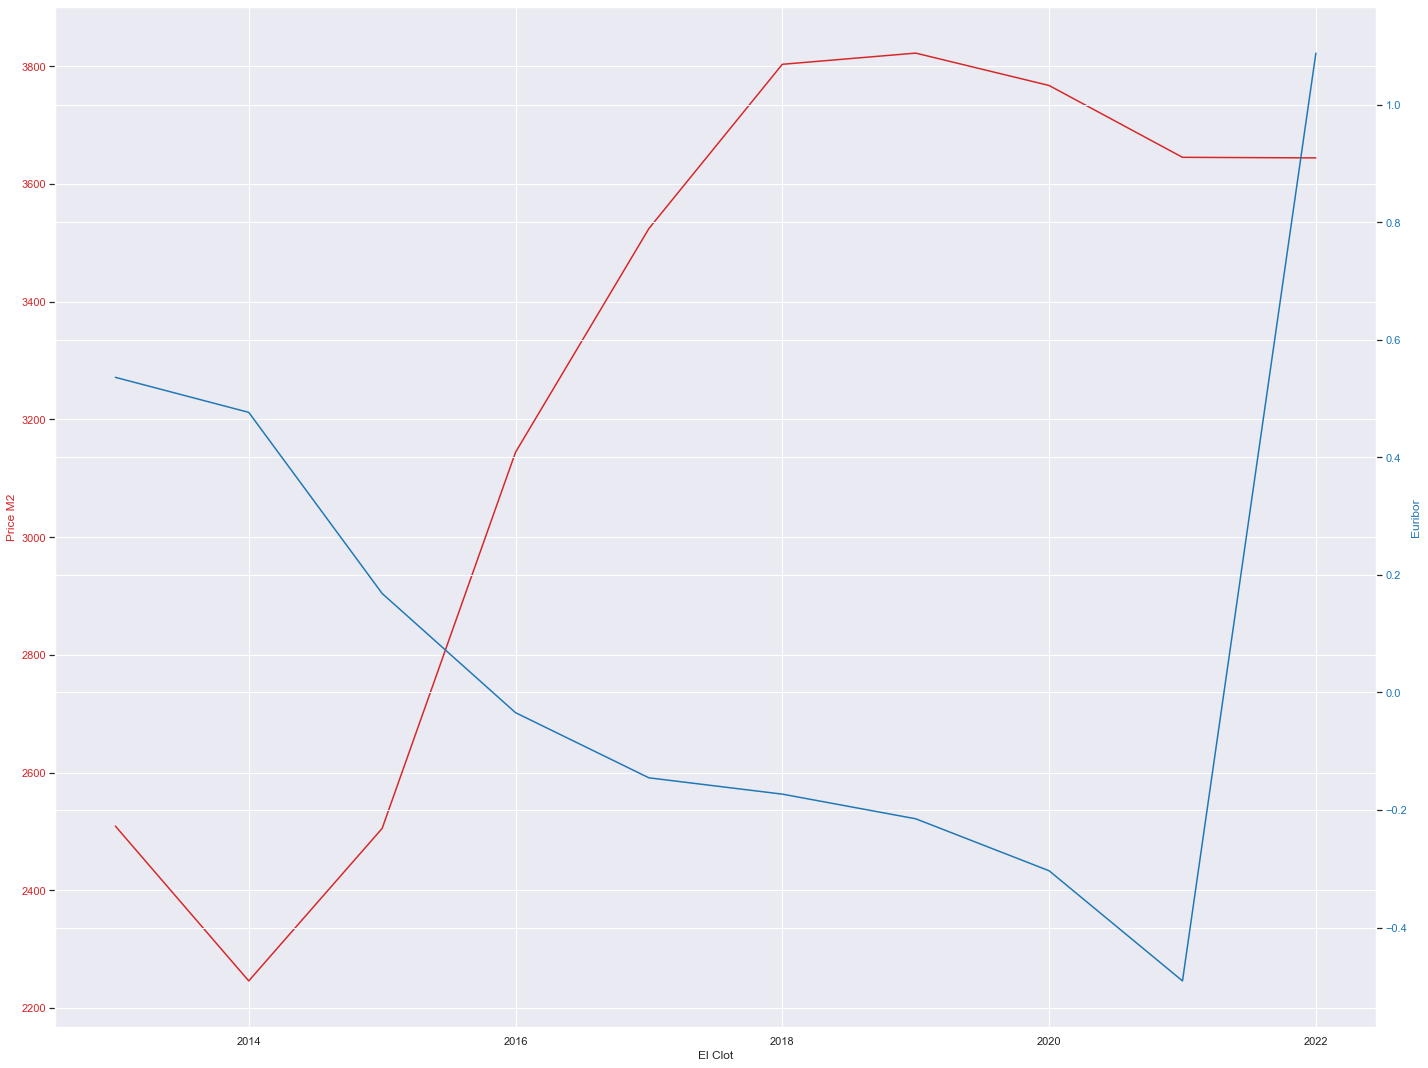

In [118]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('El Clot')
ax1.set_ylabel('Price M2', color=color)
ax1.plot(barrios_int_yoy['Years'], barrios_int_yoy['El clot'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Euribor', color=color)  # we already handled the x-label with ax1
ax2.plot(barrios_int_yoy['Years'], barrios_int_yoy['Euribor'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()